In [3298]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Todo
* Explicar graficos

In [3299]:
# En este caso internet será un diccionario en que cada key sera el nombre de la hoja y cada value la hoja en sí
internet = pd.read_excel(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI Data Analytics\pida_fviera\venv\Datasets\Internet.xlsx', sheet_name=None)

In [3300]:
acc_vel_loc_sin_rangos, velocidad_sin_Rangos, accesos_tecnologia_localidad, velocidad_porcent_prov, totales_vmd, totales_accesos_tecnologia, accesos_por_tecnologia, penetracion_poblacion, penetracion_hogares, penetracion_totales, totales_accesos_velocidad, accesos_por_velocidad, dial_baf, totales_dial_baf, ingresos = internet.values()

In [3301]:
# Se agrega dataset con la latitud y longitud del centro de cada provincia para corregir error en mapas de PowerBI

lat_long_prov = pd. read_csv(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI Data Analytics\pida_fviera\venv\Datasets\lat_long_provincias_argentina.csv', sep=';')

lat_long_prov.head()

,Provincia,Latitud,Longitud
0,Mendoza,"-34,5890","-68,3480"
1,Capital Federal,"-34,6037","-58,3816"
2,Tierra Del Fuego,"-54,8019","-68,3029"
3,Santiago Del Estero,"-27,7834","-64,2642"
4,Santa Fe,"-31,6333","-60,7000"


In [3302]:
poblacion_arg_provincia = pd.read_csv(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI Data Analytics\pida_fviera\Datasets\provincias_poblacion_censo_2022.csv', encoding='latin-1', sep=';')

poblacion_arg_provincia.head()

,Provincia,Poblacion
0,Buenos Aires,17569053
1,Capital Federal,3120612
2,Tierra Del Fuego,190641
3,Santiago Del Estero,1054028
4,Santa Fe,3556522


# EDA y Transformaciones

In [3303]:
acc_vel_loc_sin_rangos.head()

,Partido,Localidad,link Indec,Velocidad (Mbps),Provincia,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.00,1.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.50,2.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.75,19.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.00,85.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,3.50,145.0


In [3304]:
acc_vel_loc_sin_rangos['Partido'].value_counts().index

Index(['BUENOS AIRES', 'CORDOBA', 'SANTA FE', 'ENTRE RIOS', 'MENDOZA', 'SALTA',
       'RIO NEGRO', 'SANTIAGO DEL ESTERO', 'LA PAMPA', 'MISIONES', 'CHACO',
       'TUCUMAN', 'NEUQUEN', 'CORRIENTES', 'SAN JUAN', 'CHUBUT', 'FORMOSA',
       'JUJUY', 'SAN LUIS', 'LA RIOJA', 'CATAMARCA', 'SANTA CRUZ',
       'TIERRA DEL FUEGO', 'CABA'],
      dtype='object', name='Partido')

In [3305]:
velocidad_sin_Rangos.head()

,Año,Trimestre,Provincia,Velocidad,Accesos
0,2024,2,BUENOS AIRES,75.0,1062
1,2024,2,BUENOS AIRES,59.0,59
2,2024,2,BUENOS AIRES,480.0,5
3,2024,2,BUENOS AIRES,3.5,41735
4,2024,2,BUENOS AIRES,18.0,1042


In [3306]:
velocidad_sin_Rangos['Provincia'].value_counts().index

Index(['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe', 'Mendoza',
       'Río Negro', 'La Pampa', 'Misiones', 'Entre Ríos', 'Tucumán', 'Chaco',
       'Neuquén', 'Chubut', 'Salta', 'Santa Cruz', 'Jujuy', 'Corrientes',
       'Tierra Del Fuego', 'Santiago Del Estero', 'Formosa', 'San Juan',
       'San Luis', 'Catamarca', 'La Rioja', 'BUENOS AIRES', 'CORDOBA',
       'SANTA FE', 'CABA', 'RIO NEGRO', 'CHUBUT', 'MENDOZA', 'TUCUMAN',
       'SALTA', 'LA PAMPA', 'MISIONES', 'TIERRA DEL FUEGO', 'SANTA CRUZ',
       'NEUQUEN', 'ENTRE RIOS', 'CORRIENTES', 'JUJUY', 'CHACO', 'SAN JUAN',
       'SANTIAGO DEL ESTERO', 'SAN LUIS', 'FORMOSA', 'LA RIOJA', 'CATAMARCA'],
      dtype='object', name='Provincia')

## accesos_tecnologia_localidad

In [3307]:
accesos_tecnologia_localidad.head()

,Provincia,Partido,Localidad,Tecnologia,Link Indec,Accesos
0,BUENOS AIRES,25 de Mayo,25 de Mayo,ADSL,6854100,755.0
1,BUENOS AIRES,25 de Mayo,25 de Mayo,CABLEMODEM,6854100,4600.0
2,BUENOS AIRES,25 de Mayo,25 de Mayo,FIBRA OPTICA,6854100,2.0
3,BUENOS AIRES,25 de Mayo,25 de Mayo,SATELITAL,6854100,742.0
4,BUENOS AIRES,25 de Mayo,25 de Mayo,WIRELESS,6854100,727.0


In [3308]:
accesos_tecnologia_localidad['Provincia'].value_counts().index

Index(['BUENOS AIRES', 'CORDOBA', 'SANTA FE', 'SANTIAGO DEL ESTERO', 'SALTA',
       'ENTRE RIOS', 'MENDOZA', 'LA PAMPA', 'RIO NEGRO', 'MISIONES', 'CHACO',
       'CORRIENTES', 'SAN LUIS', 'JUJUY', 'NEUQUEN', 'LA RIOJA', 'CHUBUT',
       'TUCUMAN', 'SAN JUAN', 'CATAMARCA', 'FORMOSA', 'SANTA CRUZ',
       'TIERRA DEL FUEGO', 'CABA'],
      dtype='object', name='Provincia')

In [3309]:
accesos_tecnologia_localidad['Tecnologia'].value_counts().index

Index(['WIRELESS', 'FIBRA OPTICA', 'ADSL', 'SATELITAL', 'CABLEMODEM', 'Otros',
       'DIAL UP', 'OTROS', 'WIMAX', 'Cablemodem'],
      dtype='object', name='Tecnologia')

## Dataset velocidad_porcent_prov

In [3310]:
velocidad_porcent_prov.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


In [3311]:
# Revisamos si velocidad_porcent_prov['provincia'] requiere normalización
velocidad_provincia_lista = velocidad_porcent_prov['Provincia'].value_counts().index.to_list()

penetracion_provincia_lista = penetracion_poblacion['Provincia'].value_counts().index.to_list()

son_iguales = set(velocidad_provincia_lista) == set(penetracion_provincia_lista)

son_iguales

True

In [3312]:
# Se busca valores NaN
velocidad_porcent_prov['Mbps (Media de bajada)'].isna().sum()

0

In [3313]:
# Se cambia nombre de columan 'Mbps'
velocidad_porcent_prov = velocidad_porcent_prov.rename(columns={'Mbps (Media de bajada)':'Mbps'})

### Distribución y outliers 'Mbps'

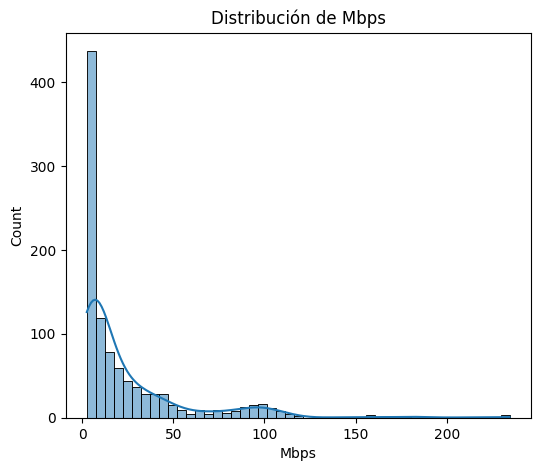

In [3314]:
plt.figure(figsize=(6,5))
sns.histplot(velocidad_porcent_prov['Mbps'], kde=True)
plt.title('Distribución de Mbps')
plt.show()

### (Explicar)

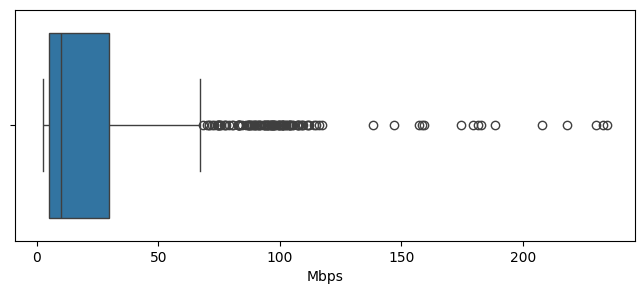

In [3315]:
plt.figure(figsize=(8,3))
sns.boxplot(data=velocidad_porcent_prov, x='Mbps')
plt.show()

### (Explicar)

In [3316]:
# Se define outliers como todos los datos por debajo y por sobre (1.5 * Rangos intercuartiles)
Q1 = velocidad_porcent_prov['Mbps'].quantile(0.25)
Q3 = velocidad_porcent_prov['Mbps'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = velocidad_porcent_prov[(velocidad_porcent_prov['Mbps'] < limite_inferior) | (velocidad_porcent_prov['Mbps'] > limite_superior)]

print(outliers.sort_values(by='Mbps', ascending=False).head(10))
print(outliers.shape)

      Año  Trimestre        Provincia    Mbps
49   2023          4  Capital Federal  234.44
1    2024          2  Capital Federal  233.01
25   2024          1  Capital Federal  229.94
73   2023          3  Capital Federal  218.13
97   2023          2  Capital Federal  208.01
121  2023          1  Capital Federal  188.65
145  2022          4  Capital Federal  182.86
18   2024          2         San Luis  181.61
42   2024          1         San Luis  179.49
66   2023          4         San Luis  174.59
(111, 4)


### Conclusión Outliers velocidad_porcent_prov:

* Considerando que los outliers se concentran en Capital Federal y en zonas demográficamente densas y siguen un patrón similar al de otros dataset se decide mantenerlos sin modificación para no afectar la naturaleza de los datos.

### Creación archivo csv velocidad_porcent_prov

In [3317]:
# Se elimina columna semestre
# velocidad_porcent_prov = velocidad_porcent_prov.drop(columns='Trimestre')

In [3318]:
# Se hace Join con dataset de latitudes y longitudes para posibles mapas en PowerBI
velocidad_porcent_prov = velocidad_porcent_prov.merge(lat_long_prov, on='Provincia', how='left')

In [3319]:
# Asegurarse de que los datos estén ordenados por Provincia, Año y Trimestre
velocidad_porcent_prov = velocidad_porcent_prov.sort_values(by=['Provincia', 'Año', 'Trimestre'])

# Crear una columna para los accesos del trimestre anterior
velocidad_porcent_prov['Trimestre anterior'] = velocidad_porcent_prov.groupby('Provincia')['Mbps'].shift(1)

# Calcular la meta como un 2% más de los accesos del trimestre anterior
velocidad_porcent_prov['Meta Mbps'] = velocidad_porcent_prov['Trimestre anterior'] * 1.02

# Valores null igual a 0 para el primer trimestre registrado de cada provincia
velocidad_porcent_prov.loc[velocidad_porcent_prov['Trimestre anterior'].isnull(), 'Meta Mbps'] = 0

# Eliminar la columna del trimestre anterior si no es necesaria
velocidad_porcent_prov = velocidad_porcent_prov.drop(columns=['Trimestre anterior'])

# Revisar los resultados
print(velocidad_porcent_prov.head())

      Año  Trimestre     Provincia      Mbps   Latitud  Longitud  Meta Mbps
984  2014          1  Buenos Aires  3.733133  -36,6769  -60,5588   0.000000
960  2014          2  Buenos Aires  3.851863  -36,6769  -60,5588   3.807795
936  2014          3  Buenos Aires  3.969047  -36,6769  -60,5588   3.928900
912  2014          4  Buenos Aires  4.198944  -36,6769  -60,5588   4.048428
888  2015          1  Buenos Aires  4.323804  -36,6769  -60,5588   4.282922


In [3320]:
velocidad_porcent_prov[velocidad_porcent_prov['Año'] != 2014].head()

,Año,Trimestre,Provincia,Mbps,Latitud,Longitud,Meta Mbps
888,2015,1,Buenos Aires,4.323804,"-36,6769","-60,5588",4.282922
864,2015,2,Buenos Aires,4.463496,"-36,6769","-60,5588",4.410280
840,2015,3,Buenos Aires,4.700598,"-36,6769","-60,5588",4.552766
816,2015,4,Buenos Aires,4.884149,"-36,6769","-60,5588",4.794610
792,2016,1,Buenos Aires,4.992168,"-36,6769","-60,5588",4.981832


In [3321]:
velocidad_porcent_prov[velocidad_porcent_prov['Año'] == 2024].head()

,Año,Trimestre,Provincia,Mbps,Latitud,Longitud,Meta Mbps
24,2024,1,Buenos Aires,159.13,"-36,6769","-60,5588",161.6598
0,2024,2,Buenos Aires,157.41,"-36,6769","-60,5588",162.3126
25,2024,1,Capital Federal,229.94,"-34,6037","-58,3816",239.1288
1,2024,2,Capital Federal,233.01,"-34,6037","-58,3816",234.5388
26,2024,1,Catamarca,91.45,"-28,4696","-65,7795",91.1880


In [3322]:
# Se cambia punto decimal por coma para no tener problemas de lectura con PowerBI
velocidad_porcent_prov['Mbps'] = velocidad_porcent_prov['Mbps'].apply(lambda x: f"{x:.2f}".replace('.', ','))
velocidad_porcent_prov['Meta Mbps'] = velocidad_porcent_prov['Meta Mbps'].apply(lambda x: f"{x:.2f}".replace('.', ','))

velocidad_porcent_prov.head()

,Año,Trimestre,Provincia,Mbps,Latitud,Longitud,Meta Mbps
984,2014,1,Buenos Aires,"3,73","-36,6769","-60,5588","0,00"
960,2014,2,Buenos Aires,"3,85","-36,6769","-60,5588","3,81"
936,2014,3,Buenos Aires,"3,97","-36,6769","-60,5588","3,93"
912,2014,4,Buenos Aires,"4,20","-36,6769","-60,5588","4,05"
888,2015,1,Buenos Aires,"4,32","-36,6769","-60,5588","4,28"


In [3323]:
velocidad_porcent_prov.to_csv(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI Data Analytics\pida_fviera\Datasets\velocidad_porcent_prov.csv', index=False)

In [3324]:
totales_vmd.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,2,139.25,Abr-Jun 2024
1,2024,1,139.15,Ene-Mar 2024
2,2023,4,139.04,Oct-Dic 2023
3,2023,3,129.67,Jul-Sept 2023
4,2023,2,123.95,Abr-Jun 2023


In [3325]:
totales_accesos_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2024,2,733491,5867504,4169958,593197,191957,11556107,Abr-Jun 2024
1,2024,1,774475,5986957,4015101,598682,257941,11633156,Ene-Mar 2024
2,2023,4,836390,6022532,3908183,585760,194796,11547661,Oct-Dic 2023
3,2023,3,897895,6018832,3708718,581436,200027,11406908,Jul-Sept 2023
4,2023,2,1006509,5997149,3463988,581823,202428,11251897,Abr-Jun 2023


## Acceso_por_tecnologia

In [3326]:
accesos_por_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [3327]:
accesos_por_tecnologia['Provincia'].value_counts().index

Index(['Mendoza', 'Capital Federal', 'Tierra Del Fuego', 'Santiago Del Estero',
       'Santa Fe', 'Santa Cruz', 'San Luis', 'San Juan', 'Salta', 'Río Negro',
       'Neuquén', 'Misiones', 'Tucumán', 'La Rioja', 'La Pampa', 'Jujuy',
       'Formosa', 'Entre Ríos', 'Corrientes', 'Córdoba', 'Chubut', 'Chaco',
       'Catamarca', 'Buenos Aires'],
      dtype='object', name='Provincia')

In [3328]:
# Revisamos si accesos_por_tecnologia['provincia'] requiere normalización. Output = True ==> no requiere normalización
lista_1 = penetracion_poblacion['Provincia'].value_counts().index 
lista_2 = accesos_por_tecnologia['Provincia'].value_counts().index

igual = set(lista_1) == set(lista_2)
print(igual)

True


In [3329]:
# Valores NaN por columna
accesos_por_tecnologia.isna().sum()

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [3330]:
# Ubicación de valores NaN
accesos_por_tecnologia[accesos_por_tecnologia['Año'].isna() == True]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3331]:
# Ubicación de valores NaN
accesos_por_tecnologia[accesos_por_tecnologia['ADSL'].isna() == True]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
1007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3332]:
# Eliminar filas con valores NaN
accesos_por_tecnologia = accesos_por_tecnologia.dropna()

In [3333]:
# Normalización de 'Año'
accesos_por_tecnologia['Año'].value_counts()

Año
2023      96
2022      96
2021      96
2020      96
2018      96
2017      96
2016      96
2015      96
2014      96
2019 *    72
2024      47
2019      24
Name: count, dtype: int64

In [3334]:
# Normalización de 'Año'
accesos_por_tecnologia['Año'] = accesos_por_tecnologia['Año'].replace({'2019 *': 2019})

In [3335]:
# Normalización de 'Trimestre'
accesos_por_tecnologia['Trimestre'].value_counts()

Trimestre
2      240
4      240
1      239
3      216
3 *     24
2 *     24
1 *     24
Name: count, dtype: int64

In [3336]:
# Normalización de 'Trimestre'
accesos_por_tecnologia['Trimestre'] = accesos_por_tecnologia['Trimestre'].replace({'3 *' : 3, '2 *': 2, '1 *': 1})

### Distribución y outliers 'ADSL'

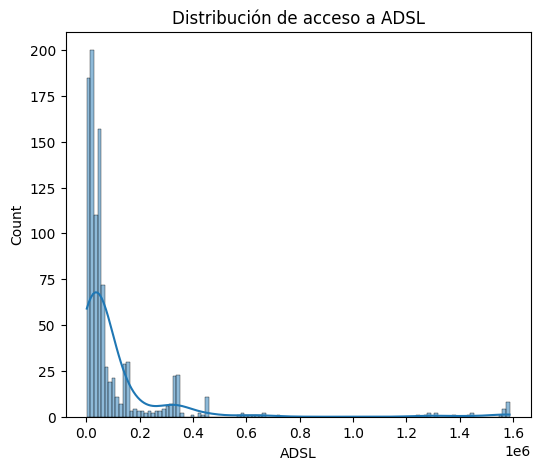

In [3337]:
plt.figure(figsize=(6,5))
sns.histplot(accesos_por_tecnologia['ADSL'], kde=True)
plt.title('Distribución de acceso a ADSL')
plt.show()

### (Exlpicar)

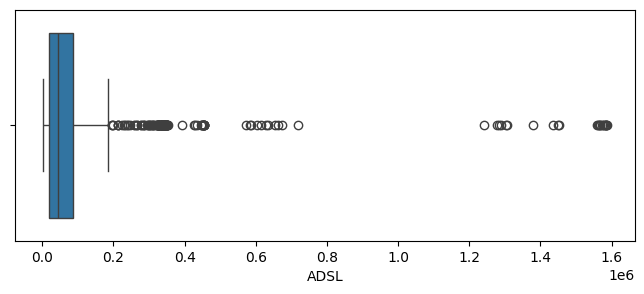

In [3338]:
plt.figure(figsize=(8,3))
sns.boxplot(data=accesos_por_tecnologia, x='ADSL')
plt.show()

### (Exlpicar)

In [3339]:
# Se define outliers como todos los datos por debajo y por sobre (1.5 * Rangos intercuartiles)
Q1 = accesos_por_tecnologia['ADSL'].quantile(0.25)
Q3 = accesos_por_tecnologia['ADSL'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = accesos_por_tecnologia[(accesos_por_tecnologia['ADSL'] < limite_inferior) | (accesos_por_tecnologia['ADSL'] > limite_superior)]

outliers.sort_values(by='ADSL' ,ascending=False).head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
815,2015,4,Buenos Aires,1586343.0,1223603.0,103269.0,20397.0,25773.0,2959385.0
839,2015,3,Buenos Aires,1585467.0,1183894.0,113590.0,19989.0,25825.0,2928765.0
791,2016,1,Buenos Aires,1583560.0,1200859.0,111231.0,21108.0,25757.0,2942515.0
887,2015,1,Buenos Aires,1583135.0,1096836.0,134177.0,18754.0,28940.0,2861842.0
863,2015,2,Buenos Aires,1581770.0,1141052.0,115660.0,19268.0,26040.0,2883790.0


### Conclusión Outliers ADSL

* Considerando que los outliers de mayor magnitud se concentran en Buenos Aires y en Capital Federal, los cuales son zonas demográficamente densas, no se considerarán como outliers.

### Distribución y outliers 'Cablemodem'

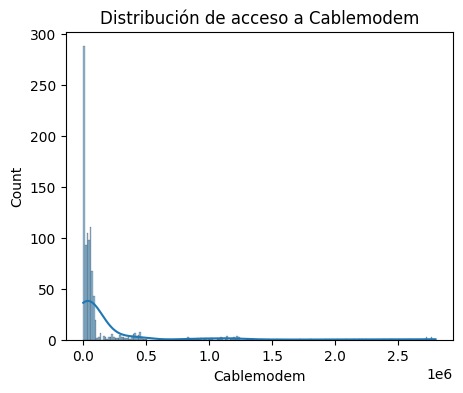

In [3340]:
plt.figure(figsize=(5,4))
sns.histplot(accesos_por_tecnologia['Cablemodem'], kde=True)
plt.title('Distribución de acceso a Cablemodem')
plt.show()

### (Exlpicar)

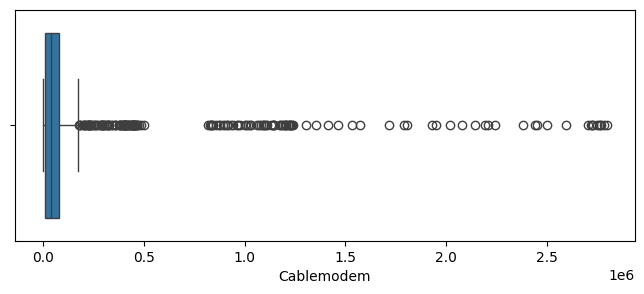

In [3341]:
plt.figure(figsize=(8,3))
sns.boxplot(data=accesos_por_tecnologia, x='Cablemodem')
plt.show()

### (Explicar)

In [3342]:
# Se define outliers como todos los datos por debajo y por sobre (1.5 * Rangos intercuartiles)
Q1 = accesos_por_tecnologia['Cablemodem'].quantile(0.25)
Q3 = accesos_por_tecnologia['Cablemodem'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = accesos_por_tecnologia[(accesos_por_tecnologia['Cablemodem'] < limite_inferior) | (accesos_por_tecnologia['Cablemodem'] > limite_superior)]

outliers.sort_values(by='Cablemodem' ,ascending=False).head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
47,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
71,2023,3,Buenos Aires,237705.0,2784175.0,1740239.0,137921.0,68197.0,4968237.0
143,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
95,2023,2,Buenos Aires,265537.0,2766463.0,1645945.0,138405.0,69138.0,4885488.0
119,2023,1,Buenos Aires,304583.0,2761043.0,1551074.0,132458.0,71770.0,4820928.0


### Conclusión Outliers Cablemodem

* Considerando que los outliers de mayor magnitud se concentran en Buenos Aires y en Capital Federal, los cuales son zonas demográficamente densas, no se considerarán como outliers.

### Distribución y outliers 'Fibra óptica'

In [3343]:
accesos_por_tecnologia = accesos_por_tecnologia.rename(columns={'Fibra óptica': 'Fibra optica'})

In [3344]:
accesos_por_tecnologia['Fibra optica'].describe()

count    1.007000e+03
mean     4.855699e+04
std      1.758694e+05
min      0.000000e+00
25%      3.540000e+02
50%      3.015000e+03
75%      2.925700e+04
max      1.849476e+06
Name: Fibra optica, dtype: float64

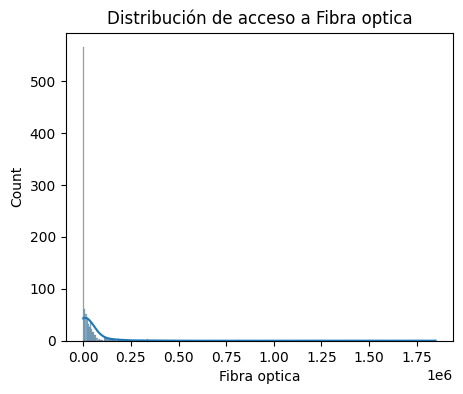

In [3345]:
plt.figure(figsize=(5,4))
sns.histplot(accesos_por_tecnologia['Fibra optica'], kde=True)
plt.title('Distribución de acceso a Fibra optica')
plt.show()

### (Explicar)

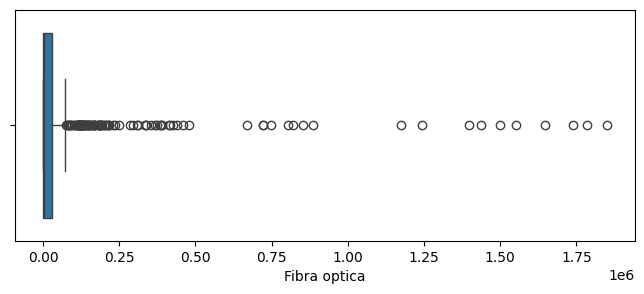

In [3346]:
plt.figure(figsize=(8,3))
sns.boxplot(data=accesos_por_tecnologia, x='Fibra optica')
plt.show()

### (Explicar)

In [3347]:
# Se define outliers como todos los datos por debajo y por sobre (1.5 * Rangos intercuartiles)
Q1 = accesos_por_tecnologia['Fibra optica'].quantile(0.25)
Q3 = accesos_por_tecnologia['Fibra optica'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = accesos_por_tecnologia[(accesos_por_tecnologia['Fibra optica'] < limite_inferior) | (accesos_por_tecnologia['ADSL'] > limite_superior)]

outliers.shape

(280, 9)

### Conclusión Outliers Fibra optica

* Considerando que los outliers de mayor magnitud se concentran en Buenos Aires, la cual es una zona demográficamente densa, no se considerarán como outliers.

### Distribución y outliers Wireless

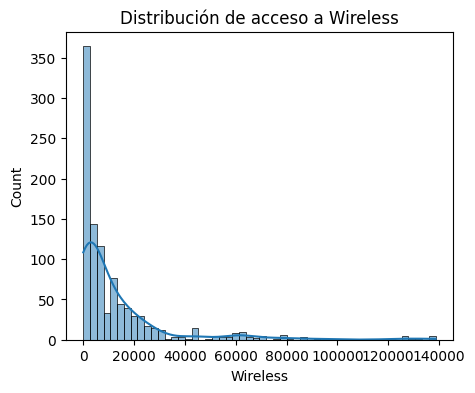

In [3348]:
plt.figure(figsize=(5,4))
sns.histplot(accesos_por_tecnologia['Wireless'], kde=True)
plt.title('Distribución de acceso a Wireless')
plt.show()

### (Explicar)

### Conclusión Outliers Wireless

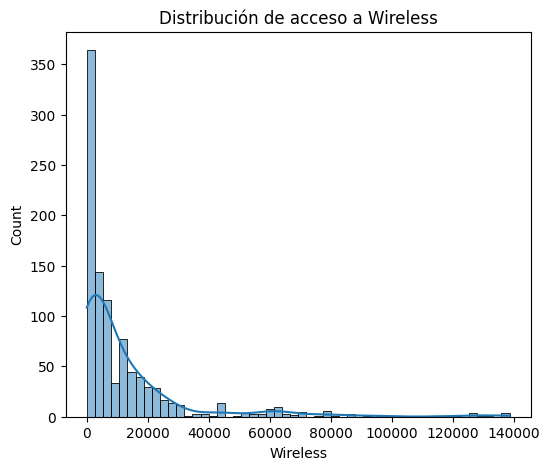

In [3349]:
plt.figure(figsize=(6,5))
sns.histplot(accesos_por_tecnologia['Wireless'], kde=True)
plt.title('Distribución de acceso a Wireless')
plt.show()

### (Explicar)

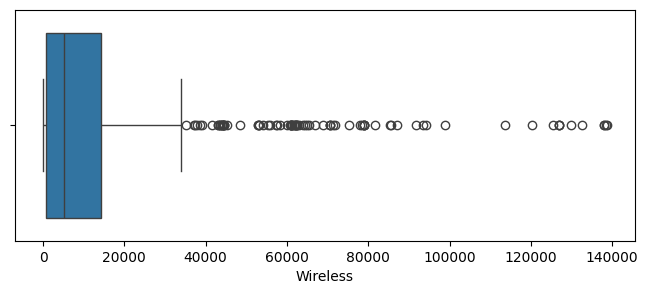

In [3350]:
plt.figure(figsize=(8,3))
sns.boxplot(data=accesos_por_tecnologia, x='Wireless')
plt.show()

### (Explicar)

In [3351]:
# Se define outliers como todos los datos por debajo y por sobre (1.5 * Rangos intercuartiles)
Q1 = accesos_por_tecnologia['Wireless'].quantile(0.25)
Q3 = accesos_por_tecnologia['Wireless'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = accesos_por_tecnologia[(accesos_por_tecnologia['Wireless'] < limite_inferior) | (accesos_por_tecnologia['Wireless'] > limite_superior)]

outliers.shape

(87, 9)

### Conclusión Outliers Wireless

* Considerando que los outliers de mayor magnitud se concentran en Buenos Aires, la cual es una zona demográficamente densa, no se considerarán como outliers.

### Distribución y outliers 'Otros'

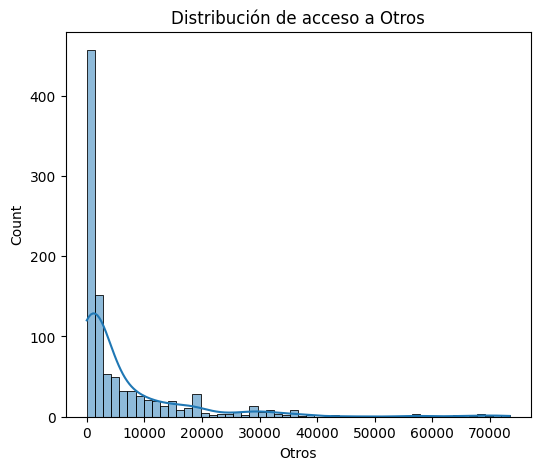

In [3352]:
plt.figure(figsize=(6,5))
sns.histplot(accesos_por_tecnologia['Otros'], kde=True)
plt.title('Distribución de acceso a Otros')
plt.show()

### (Explicar)

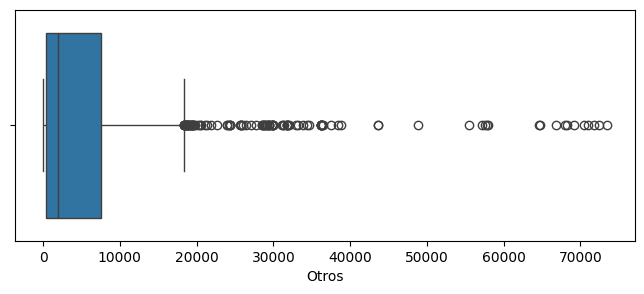

In [3353]:
plt.figure(figsize=(8,3))
sns.boxplot(data=accesos_por_tecnologia, x='Otros')
plt.show()

### (Explicar)

In [3354]:
# Se define outliers como todos los datos por debajo y por sobre (1.5 * Rangos intercuartiles)
Q1 = accesos_por_tecnologia['Otros'].quantile(0.25)
Q3 = accesos_por_tecnologia['Otros'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = accesos_por_tecnologia[(accesos_por_tecnologia['Otros'] < limite_inferior) | (accesos_por_tecnologia['Otros'] > limite_superior)]

outliers.shape

(109, 9)

### Conclusión Outliers Otros

* Considerando que los outliers de mayor magnitud se concentran en Buenos Aires y en Capital Federal, los cuales son zonas demográficamente densas, no se considerarán como outliers.

### Distribución y outliers 'Total'

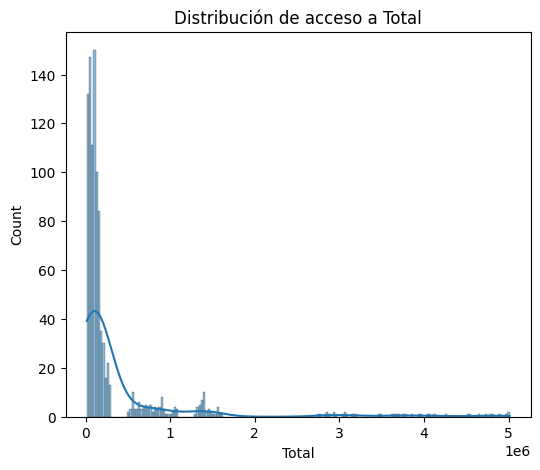

In [3355]:
plt.figure(figsize=(6,5))
sns.histplot(accesos_por_tecnologia['Total'], kde=True)
plt.title('Distribución de acceso a Total')
plt.show()

### (Explicar)

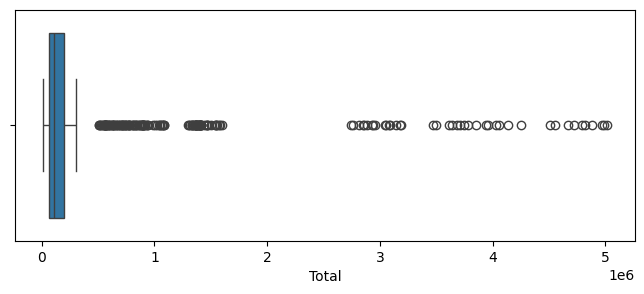

In [3356]:
plt.figure(figsize=(8,3))
sns.boxplot(data=accesos_por_tecnologia, x='Total')
plt.show()

### (Explicar)

In [3357]:
# Se define outliers como todos los datos por debajo y por sobre (1.5 * Rangos intercuartiles)
Q1 = accesos_por_tecnologia['Total'].quantile(0.25)
Q3 = accesos_por_tecnologia['Total'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = accesos_por_tecnologia[(accesos_por_tecnologia['Total'] < limite_inferior) | (accesos_por_tecnologia['Total'] > limite_superior)]

outliers

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra optica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
5,2024,2,Córdoba,93483.0,443091.0,477504.0,62162.0,9534.0,1085774.0
20,2024,2,Santa Fe,88486.0,394939.0,390090.0,44286.0,13172.0,930973.0
24,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
...,...,...,...,...,...,...,...,...,...
979,2014,2,Santa Fe,324101.0,178495.0,3085.0,6041.0,636.0,512358.0
983,2014,1,Buenos Aires,1567685.0,1000879.0,120960.0,16528.0,33824.0,2739876.0
984,2014,1,Capital Federal,445569.0,820161.0,17767.0,1866.0,14555.0,1299918.0
988,2014,1,Córdoba,336841.0,225769.0,347.0,3585.0,368.0,566910.0


### Conclusión Outliers Total

* Considerando que los outliers de mayor magnitud se concentran en Buenos Aires, la cual es una zona demográficamente densa, no se considerarán como outliers.

In [3358]:
accesos_por_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra optica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


### Creación dataset con metas a conseguir de accesos por trimestre

In [3359]:
# Agrupar por Año, Trimestre y Provincia
accesos_anuales_tecnologia = accesos_por_tecnologia.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False).sum()

# Crear columnas para los accesos del trimestre anterior y las metas por cada tecnología
tecnologias = ['ADSL', 'Cablemodem', 'Fibra optica', 'Wireless', 'Otros']

# Asegurarse de que los datos estén ordenados por Provincia, Año y Trimestre
accesos_anuales_tecnologia = accesos_anuales_tecnologia.sort_values(by=['Provincia', 'Año', 'Trimestre'])

for tech in tecnologias:
    # Calcular accesos del trimestre anterior para cada tecnología
    accesos_anuales_tecnologia[f'{tech} trimestre anterior'] = accesos_anuales_tecnologia.groupby('Provincia')[tech].shift(1)

    # Calcular la meta (2% más que el trimestre anterior)
    accesos_anuales_tecnologia[f'{tech} meta'] = accesos_anuales_tecnologia[f'{tech} trimestre anterior'] * 1.02

# Crear una columna para los accesos del trimestre anterior (total)
accesos_anuales_tecnologia['Total trimestre anterior'] = accesos_anuales_tecnologia.groupby('Provincia')['Total'].shift(1)

# Calcular la meta como un 2% más de los accesos del trimestre pasado (total)
accesos_anuales_tecnologia['Total meta'] = accesos_anuales_tecnologia['Total trimestre anterior'] * 1.02

# Eliminar las columnas del trimestre anterior si no serán usadas
accesos_anuales_tecnologia = accesos_anuales_tecnologia.drop(columns=[f'{tech} trimestre anterior' for tech in tecnologias] + ['Total trimestre anterior'])

# Reemplazar los valores NaN por 0 en todas las columnas numéricas
accesos_anuales_tecnologia = accesos_anuales_tecnologia.fillna(0)

# Convertir todas las columnas numéricas a enteros
accesos_anuales_tecnologia = accesos_anuales_tecnologia.astype({col: 'int' for col in accesos_anuales_tecnologia.select_dtypes(include='float').columns})

# Calcular la tecnología con mayor proporción
for tech in tecnologias:
    accesos_anuales_tecnologia[f"{tech}_proporcion"] = accesos_anuales_tecnologia[tech] / accesos_anuales_tecnologia["Total"]

# Identificar la tecnología con mayor proporción
accesos_anuales_tecnologia["Tecnologia Predominante"] = accesos_anuales_tecnologia[tecnologias].idxmax(axis=1)

# Eliminar las columnas de proporción que no serán usadas
accesos_anuales_tecnologia = accesos_anuales_tecnologia.drop(columns=[f'{tech}_proporcion' for tech in tecnologias])

# Mostrar el resultado
print(accesos_anuales_tecnologia.head())

     Año  Trimestre     Provincia     ADSL  Cablemodem  Fibra optica  \
0   2014          1  Buenos Aires  1567685     1000879        120960   
24  2014          2  Buenos Aires  1568881     1025490        120008   
48  2014          3  Buenos Aires  1562533     1110628        124474   
72  2014          4  Buenos Aires  1575978     1070135        120528   
96  2015          1  Buenos Aires  1583135     1096836        134177   

    Wireless  Otros    Total  ADSL meta  Cablemodem meta  Fibra optica meta  \
0      16528  33824  2739876          0                0                  0   
24     17020  33147  2764546    1599038          1020896             123379   
48     20049  31881  2849565    1600258          1045999             122408   
72     17728  32038  2816407    1593783          1132840             126963   
96     18754  28940  2861842    1607497          1091537             122938   

    Wireless meta  Otros meta  Total meta Tecnologia Predominante  
0               0       

In [3360]:
accesos_anuales_tecnologia.to_csv(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI Data Analytics\pida_fviera\Datasets\accesos_anuales_tecnologia.csv', index=False)

## penetracion_poblacion

In [3361]:
penetracion_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,2,Buenos Aires,27.43
1,2024,2,Capital Federal,47.44
2,2024,2,Catamarca,17.50
3,2024,2,Chaco,11.78
4,2024,2,Chubut,26.46


In [3362]:
penetracion_poblacion['Provincia'].value_counts().index

Index(['Buenos Aires', 'Jujuy', 'Río Negro', 'Neuquén', 'Misiones',
       'Capital Federal', 'La Rioja', 'La Pampa', 'Mendoza', 'Formosa',
       'Entre Ríos', 'Corrientes', 'Córdoba', 'Chubut', 'Chaco', 'Catamarca',
       'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe',
       'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype='object', name='Provincia')

In [3363]:
penetracion_poblacion.isna().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

### Distribución y outliers 'Accesos por cada 100 hogares'

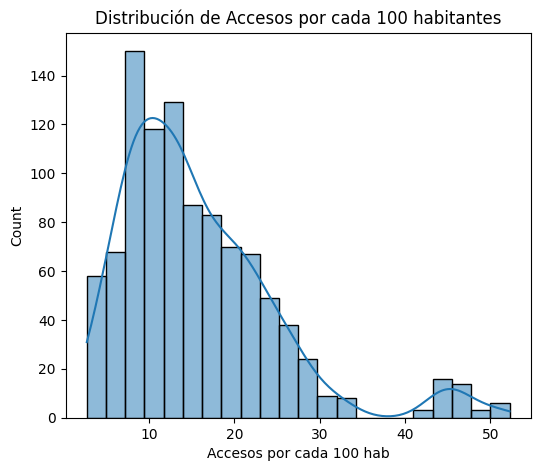

In [3364]:
plt.figure(figsize=(6,5))
sns.histplot(penetracion_poblacion['Accesos por cada 100 hab'], kde=True)
plt.title('Distribución de Accesos por cada 100 habitantes')
plt.show()

### (EXPLICAR)

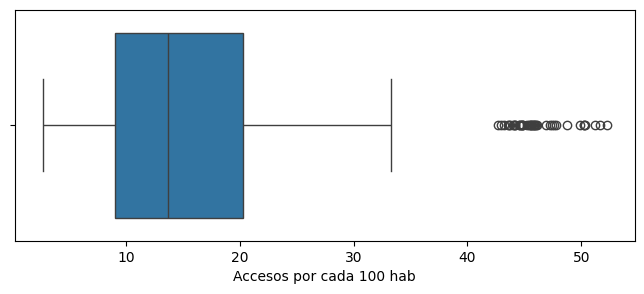

In [3365]:
plt.figure(figsize=(8,3))
sns.boxplot(data=penetracion_poblacion, x='Accesos por cada 100 hab')
plt.show()

### (EXPLICAR)

In [3366]:
# Se define outliers como todos los datos por debajo y por sobre (1.5 * Rangos intercuartiles)
Q1 = penetracion_poblacion['Accesos por cada 100 hab'].quantile(0.25)
Q3 = penetracion_poblacion['Accesos por cada 100 hab'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = penetracion_poblacion[(penetracion_poblacion['Accesos por cada 100 hab'] < limite_inferior) | (penetracion_poblacion['Accesos por cada 100 hab'] > limite_superior)]

print(outliers.head())
print(outliers.shape)

     Año  Trimestre        Provincia  Accesos por cada 100 hab
1   2024          2  Capital Federal                     47.44
25  2024          1  Capital Federal                     48.78
49  2023          4  Capital Federal                     47.80
73  2023          3  Capital Federal                     47.60
97  2023          2  Capital Federal                     47.27
(42, 4)


### Conclusión Outliers penetracion_poblacion:

* Considerando que los outliers se concentran en Capital Federal la cual es una zona demográficamente densa no se considerarán como outliers los datos obtenidos anterirormente.

### Creación dataset penetración_población_anual

In [3367]:
# Agrupar por Año, Trimestre y Provincia y sumar los valores
penetracion_hogares_anual = penetracion_poblacion.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False).sum()

# Se hace Join con el dataset de latitudes y longitudes para preparar los datos para los mapas en Power BI
penetracion_hogares_anual = penetracion_hogares_anual.merge(lat_long_prov, on='Provincia', how='left')

# Cambiar el nombre de la columna 'Accesos por cada 100 hab'
penetracion_hogares_anual = penetracion_hogares_anual.rename(columns={'Accesos por cada 100 hab': 'Accesos/100 hab'})

# Cambiar el tipo de las columnas
penetracion_hogares_anual = penetracion_hogares_anual.astype({'Accesos/100 hab': 'float64'})

# Asegurarse de que los datos estén ordenados por Provincia, Año y Trimestre
penetracion_hogares_anual = penetracion_hogares_anual.sort_values(by=['Provincia', 'Año', 'Trimestre'])

# Crear una columna para los accesos del trimestre anterior
penetracion_hogares_anual['Accesos poblacion trimestre anterior'] = penetracion_hogares_anual.groupby('Provincia')['Accesos/100 hab'].shift(1)

# Calcular la meta como un 2% más de los accesos del trimestre anterior
penetracion_hogares_anual['Accesos poblacion meta'] = penetracion_hogares_anual['Accesos poblacion trimestre anterior'] * 1.02

# Reemplaza los valores NaN por 0 en todas las columnas numéricas
penetracion_hogares_anual = penetracion_hogares_anual.fillna(0)

# Se cambia punto decimal por coma para no tener problemas de lectura con PowerBI
penetracion_hogares_anual['Accesos/100 hab'] = penetracion_hogares_anual['Accesos/100 hab'].apply(lambda x: f"{x:.2f}".replace('.', ','))
penetracion_hogares_anual['Accesos poblacion trimestre anterior'] = penetracion_hogares_anual['Accesos poblacion trimestre anterior'].apply(lambda x: f"{x:.2f}".replace('.', ','))
penetracion_hogares_anual['Accesos poblacion meta'] = penetracion_hogares_anual['Accesos poblacion meta'].apply(lambda x: f"{x:.2f}".replace('.', ','))


penetracion_hogares_anual.head()

,Año,Trimestre,Provincia,Accesos/100 hab,Latitud,Longitud,Accesos poblacion trimestre anterior,Accesos poblacion meta
0,2014,1,Buenos Aires,"16,69","-36,6769","-60,5588","0,00","0,00"
16,2014,2,Buenos Aires,"16,79","-36,6769","-60,5588","16,69","17,03"
40,2014,3,Buenos Aires,"17,26","-36,6769","-60,5588","16,79","17,13"
64,2014,4,Buenos Aires,"17,01","-36,6769","-60,5588","17,26","17,61"
88,2015,1,Buenos Aires,"17,24","-36,6769","-60,5588","17,01","17,36"


In [3368]:
penetracion_hogares_anual.to_csv(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI Data Analytics\pida_fviera\Datasets\penetracion_poblacion_anual.csv', index=False)

## penetracion_hogares

In [3369]:
penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81
3,2024,2,Chaco,44.06
4,2024,2,Chubut,86.33


In [3370]:
penetracion_hogares['Provincia'].value_counts().index

Index(['Buenos Aires', 'Jujuy', 'Río Negro', 'Neuquén', 'Misiones',
       'Capital Federal', 'La Rioja', 'La Pampa', 'Mendoza', 'Formosa',
       'Entre Ríos', 'Corrientes', 'Córdoba', 'Chubut', 'Chaco', 'Catamarca',
       'Salta', 'San Juan', 'San Luis', 'Santa Cruz', 'Santa Fe',
       'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype='object', name='Provincia')

In [3371]:
penetracion_hogares.isna().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

### Distribución y outliers 'Accesos por cada 100 hogares'

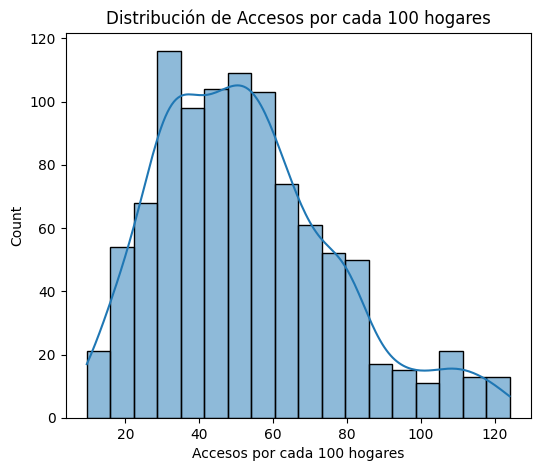

In [3372]:
plt.figure(figsize=(6,5))
sns.histplot(penetracion_hogares['Accesos por cada 100 hogares'], kde=True)
plt.title('Distribución de Accesos por cada 100 hogares')
plt.show()

### (EXPLICAR)

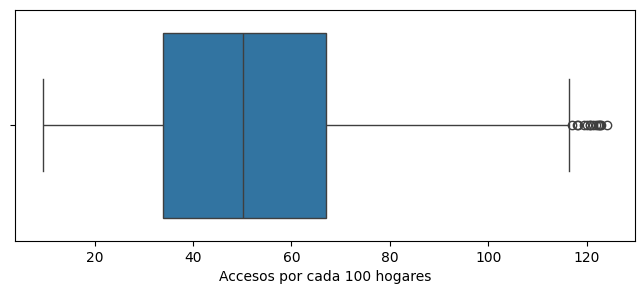

In [3373]:
plt.figure(figsize=(8,3))
sns.boxplot(data=penetracion_hogares, x='Accesos por cada 100 hogares')
plt.show()

### (EXPLICAR)

In [3374]:
# Se define outliers como todos los datos por debajo y por sobre (1.5 * Rangos intercuartiles)
Q1 = penetracion_hogares['Accesos por cada 100 hogares'].quantile(0.25)
Q3 = penetracion_hogares['Accesos por cada 100 hogares'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = penetracion_hogares[(penetracion_hogares['Accesos por cada 100 hogares'] < limite_inferior) | (penetracion_hogares['Accesos por cada 100 hogares'] > limite_superior)]

outliers

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
25,2024,1,Capital Federal,119.530000
49,2023,4,Capital Federal,117.020000
121,2023,1,Capital Federal,122.590000
145,2022,4,Capital Federal,122.730000
169,2022,3,Capital Federal,122.280000
193,2022,2,Capital Federal,121.310000
625,2017,4,Capital Federal,122.897424
649,2017,3,Capital Federal,121.858326
673,2017,2,Capital Federal,124.061394
721,2016,4,Capital Federal,120.631332


### Conclusión Outliers penetracion_hogares:

* Considerando que los outliers se concentran en Capital Federal, la cual es una zona demográficamente densa, no se consideraran como outliers los datos obtenidos anteriormente.

In [3375]:
# Agrupar por Año, Trimestre y Provincia y sumar los valores
penetracion_hogares_anual = penetracion_hogares.groupby(['Año', 'Trimestre', 'Provincia'], as_index=False).sum()

# Se hace Join con el dataset de latitudes y longitudes para preparar los datos para los mapas en Power BI
penetracion_hogares_anual = penetracion_hogares_anual.merge(lat_long_prov, on='Provincia', how='left')

# Cambiar el nombre de la columna 'Accesos por cada 100 hogare'
penetracion_hogares_anual = penetracion_hogares_anual.rename(columns={'Accesos por cada 100 hogares': 'Accesos/100 hogares'})

# Cambiar el tipo de las columnas
penetracion_hogares_anual = penetracion_hogares_anual.astype({'Accesos/100 hogares': 'float64'})

# Asegurarse de que los datos estén ordenados por Provincia, Año y Trimestre
penetracion_hogares_anual = penetracion_hogares_anual.sort_values(by=['Provincia', 'Año', 'Trimestre'])

# Crear una columna para los accesos del trimestre anterior
penetracion_hogares_anual['Accesos hogares trimestre anterior'] = penetracion_hogares_anual.groupby('Provincia')['Accesos/100 hogares'].shift(1)

# Calcular la meta como un 2% más de los accesos del trimestre anterior
penetracion_hogares_anual['Accesos hogares meta'] = penetracion_hogares_anual['Accesos hogares trimestre anterior'] * 1.02

# Reemplaza los valores NaN por 0 en todas las columnas numéricas
penetracion_hogares_anual = penetracion_hogares_anual.fillna(0)

# Se cambia punto decimal por coma para no tener problemas de lectura con PowerBI
penetracion_hogares_anual['Accesos/100 hogares'] = penetracion_hogares_anual['Accesos/100 hogares'].apply(lambda x: f"{x:.2f}".replace('.', ','))
penetracion_hogares_anual['Accesos hogares trimestre anterior'] = penetracion_hogares_anual['Accesos hogares trimestre anterior'].apply(lambda x: f"{x:.2f}".replace('.', ','))
penetracion_hogares_anual['Accesos hogares meta'] = penetracion_hogares_anual['Accesos hogares meta'].apply(lambda x: f"{x:.2f}".replace('.', ','))


penetracion_hogares_anual.head()

,Año,Trimestre,Provincia,Accesos/100 hogares,Latitud,Longitud,Accesos hogares trimestre anterior,Accesos hogares meta
0,2014,1,Buenos Aires,"54,57","-36,6769","-60,5588","0,00","0,00"
16,2014,2,Buenos Aires,"55,06","-36,6769","-60,5588","54,57","55,66"
40,2014,3,Buenos Aires,"56,75","-36,6769","-60,5588","55,06","56,16"
64,2014,4,Buenos Aires,"56,09","-36,6769","-60,5588","56,75","57,89"
88,2015,1,Buenos Aires,"56,37","-36,6769","-60,5588","56,09","57,22"


In [3376]:
penetracion_hogares_anual.to_csv(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI Data Analytics\pida_fviera\Datasets\penetracion_hogares_anual.csv', index=False)

## penetracion_totales

In [3377]:
penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,2,78.13,24.57,Abr-Jun 2024
1,2024,1,78.89,24.79,Ene-Mar 2024
2,2023,4,78.56,24.66,Oct-Dic 2023
3,2023,3,77.84,24.41,Jul-Sept 2023
4,2023,2,77.02,24.14,Abr-Jun 2023


In [3378]:
totales_accesos_velocidad.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2024,2,28151,67024,840200,911374,662649,348253,8357088,341368,11556107
1,2024,1,28801,69355,866152,950930,672155,353896,8363694,328173,11633156
2,2023,4,29708,71742,900253,978108,697232,350290,8224736,295592,11547661
3,2023,3,30274,80609,945608,998725,720084,350918,8003269,277421,11406908
4,2023,2,30827,79405,963510,1028250,734125,364730,7775095,275955,11251897


In [3379]:
accesos_por_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,2,Buenos Aires,25287.0,23034.0,222627.0,221660.0,244528.0,106302.0,4020395.0,125547.0,4989380.0
1,2024,2,Capital Federal,518.0,4122.0,24539.0,40296.0,33158.0,5633.0,1355333.0,0.0,1463599.0
2,2024,2,Catamarca,72.0,164.0,2660.0,3093.0,3799.0,1279.0,63954.0,53.0,75074.0
3,2024,2,Chaco,236.0,349.0,14594.0,8336.0,6208.0,6454.0,107707.0,3208.0,147092.0
4,2024,2,Chubut,125.0,1139.0,43699.0,31971.0,22696.0,19827.0,38212.0,16554.0,174223.0


In [3380]:
dial_baf.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2024,2,Buenos Aires,4983480,5900.0,4989380
1,2024,2,Capital Federal,1461549,2050.0,1463599
2,2024,2,Catamarca,75073,1.0,75074
3,2024,2,Chaco,147087,5.0,147092
4,2024,2,Chubut,173366,857.0,174223


In [3381]:
totales_dial_baf.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2024,2,11544314,11793,11556107,Abr-Jun 2024
1,2024,1,11621363,11793,11633156,Ene-Mar 2024
2,2023,4,11535868,11793,11547661,Oct-Dic 2023
3,2023,3,11395115,11793,11406908,Jul-Sept 2023
4,2023,2,11239781,12116,11251897,Abr-Jun 2023


In [3382]:
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,4.420322e+08,Abr-Jun 2024
1,2024,1,3.461990e+08,Ene-Mar 2024
2,2023,4,1.673760e+08,Oct-Dic 2023
3,2023,3,1.331066e+08,Jul-Sept 2023
4,2023,2,1.180603e+08,Jun-Mar 2023


In [3383]:
# Se revisa si hay problemas con el formato de "comas" v/s "puntos"
    # En el excel el valor es de "442032166,69"
ingresos['Ingresos (miles de pesos)'].iloc[0]

442032166.69

Es clave: ANÁLISIS, CONCLUSiONES Y RECOMENDACIONES

---------------------------------------------------------------------------------------------------------------------------------------------------------------

### Dataset mapa_conectividad será útil para explorar zonas geográficas

In [3384]:
mapa_conectividad = pd.read_excel(r'C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI Data Analytics\pida_fviera\venv\Datasets\mapa_conectividad.xlsx')

In [3385]:
mapa_conectividad.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,25 de Mayo,25 de Mayo,23408,SI,SI,--,--,SI,SI,SI,SI,SI,6854100.0,-35.433939,-60.173121
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,280,--,--,--,--,--,--,SI,--,--,6854010.0,-35.739217,-60.559063
2,BUENOS AIRES,25 de Mayo,Del Valle,899,SI,--,--,--,SI,--,--,SI,--,6854020.0,-35.897345,-60.731609
3,BUENOS AIRES,25 de Mayo,Ernestina,145,SI,--,--,--,--,--,SI,--,--,6854030.0,-35.270234,-59.557503
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,547,--,--,--,--,--,SI,--,--,--,6854040.0,-35.164397,-60.081358


## Mapa Provincias argentinas

In [3386]:
# import geopandas as gpd

In [3387]:
# Leer archivo GeoJson con las provincias Argentinas
# geo_provincias = gpd.read_file(r"C:\Users\felip\Desktop\Stuff\Cursos\SoyHenry\Clases\LABS\PI Data Analytics\pida_fviera\gadm41_ARG_1.json")


In [3388]:
# print(geo_provincias.columns)

In [3389]:
# Asignar la columna correcta con los nombres de provincias (sustituye NAME_1 si es necesario)
# geo_provincias['Provincia'] = geo_provincias['NAME_1'].str.title()

# Mostrar las primeras filas para verificar
# print(geo_provincias[['Provincia', 'geometry']].head())

In [3390]:
# Se deben normalizar las provincias
# geo_provincias['Provincia'].value_counts().index

In [3391]:
# # Plotear el mapa
# fig, ax = plt.subplots(1, 1, figsize=(10,10))
# geo_provincias.plot(column='Accesos por cada 100 hogares',
#                     cmap='Blues',
#                     legend=True,
#                     ax=ax,
#                     edgecolor='black')

# plt.title('Accesos por cada 100 hogares en Argentina', fontsize=15)
# plt.show()

### Se debe normalizar la columna provincia del dataset mapa_conectividad

Nota: No creo que el dataset vaya a ser necesario

In [3392]:
# mapa_conectividad['Provincia'].value_counts().index

Se toma como referencia las provincias de dataset penetracion_hogares

In [3393]:
# penetracion_hogares['Provincia'].value_counts().index

# Provincias con acento:
    # 'Río Negro', 'Neuquén', 'Entre Ríos', 'Córdoba', 'Tucumán'

In [3394]:
# Diccionario de mapeo: valores originales -> valores normalizados
mapeo_provincias = {
    'BUENOS AIRES': 'Buenos Aires',
    'CORDOBA': 'Córdoba',
    'SANTA FE': 'Santa Fe',
    'SAN LUIS': 'San Luis',
    'MENDOZA': 'Mendoza',
    'ENTRE RIOS': 'Entre Ríos',
    'CATAMARCA': 'Catamarca',
    'SANTIAGO DEL ESTERO': 'Santiago Del Estero',
    'RIO NEGRO': 'Río Negro',
    'JUJUY': 'Jujuy',
    'MISIONES': 'Misiones',
    'SALTA': 'Salta',
    'TUCUMAN': 'Tucumán',
    'SAN JUAN': 'San Juan',
    'LA RIOJA': 'La Rioja',
    'CHACO': 'Chaco',
    'CHUBUT': 'Chubut',
    'LA PAMPA': 'La Pampa',
    'CORRIENTES': 'Corrientes',
    'FORMOSA': 'Formosa',
    'NEUQUEN': 'Neuquén',
    'CABA': 'Capital Federal',
    'SANTA CRUZ': 'Santa Cruz',
    'TIERRA DEL FUEGO': 'Tierra Del Fuego'
}

# Aplicar el mapeo para normalizar la columna 'Provincia' de mapa_conectividad
mapa_conectividad['Provincia'] = mapa_conectividad['Provincia'].replace(mapeo_provincias)

mapa_conectividad['Provincia'].value_counts().index

Index(['Buenos Aires', 'Córdoba', 'Santa Fe', 'San Luis', 'Mendoza',
       'Entre Ríos', 'Catamarca', 'Santiago Del Estero', 'Río Negro', 'Jujuy',
       'Misiones', 'Salta', 'Tucumán', 'San Juan', 'La Rioja', 'Chaco',
       'Chubut', 'La Pampa', 'Corrientes', 'Formosa', 'Neuquén',
       'Capital Federal', 'Santa Cruz', 'Tierra Del Fuego'],
      dtype='object', name='Provincia')

### Objetivo:
Reconocer el comportamiento del sector a nivel nacional

Nota: 
* la principal actividad de la empresa es brindar acceso a internet
* Dataset obligatorio: internet
* Repositorios están siendo ignorados por git, moverlos o crear nuevos cuando corresponda para que se vean reflejados en proyecto

### Insights:
Nota: División geógrafica será por provincia ya que es el punto en común entre muchos datasets.

* Localidades Geográficas con poca penetración (Posible mercado ?)
    * comentar que localidades tienen poca penetración, siendo posibles mercados sub-explotados con potencial de crecimiento.
* Velocidad en ciertas áreas geográficas
    * Provincias con bajas velocidades pueden necesitar inversión en infraestructura.
    * bajas velocidades podrían estar relacionadas con insatisfacción en la calidad del servicio, pudiendo ser una oportunidad para ofrecer mayores velocidades o mejorar el que ya se ofrece.
Notas:

Densidad poblacional:
* Provincias con alta densidad pueden ser más atractivas para inversión en infraestructura, ya que los costos se distribuyen entre más clientes potenciales.

Preferencias por Tecnologías:
* Provincias con alta adopción de tecnologías avanzadas (como fibra óptica) indican interés por servicios de mayor calidad.


## Requerimientos rúbrica

Requerimientos EDA:
* Outliers
* Duplicados
* NaN's
* Gráficos pertinentes con el tipo de variable (cualitativa/quantitativa)
    * Gráfico acompañado de análisis profundo y conclusiones obtenidas
* Uso de markdown para documentar paso a paso del análisis, justificando decisiones tomadas.

Readme:
* Descripción detallada y concisa del proyecto
* Presentación clara y concisa del proyecto
* Se mencionan tecnologías y herramientas utilizadas
* Se explica metodología que se siguió
* se presentan análisis detallados y conclusiones fundamentadas

KPI's:
* mínimo 3 kpi's en dashboard. Se debe explicar y defender la elección de estos.
* Saber distinción entre métrica y kpi, utilizando visuales apropiadas para estos últimos

Dashboard 

1) funcionalidad y usabilidad:
* filtros, selecciones y acciones implementadas son eficientes y tienen valor estratégico para agregar valor al análisis
* UX con navegación intuitiva, funciones no requieren explicaciones adicionales

2) Compresión propósito:
* Muestra visión general de los datos con info clave para toma de decisiones
* Se enfoca en indicadores clave relevantes respecto del objetivo

3) Diseño:
* Fácil comprensión
* Elementos alineados, colores y tipografía consistente
* Uso Técnicas de diseño (tamaño, color, posición) para guiar atención

Gráficas:

* Gráficas corresponde con tipo de variable y representa lo que pretende
* Estilo uniforme y consistente, escala adecuada, títulos de ejes y etiquetas son descriptivos
* Idioma y denominación de variables se encuentran unificados